#DATA EXPLORATION

In [73]:
## KEEPOUTPUT
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
d = pd.read_csv("https://raw.githubusercontent.com/CarlosCastano33/Prediccion-de-cancelacion-de-reserva/main/train.csv")
d.tail()

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,67.5,no_of_special_requests,booking_status
28063,28063,2,0,0,1,0,0,0,122,NaN,NaN,NaN,1,0,0,0,135.99,0,0
28064,28064,2,0,2,2,0,0,3,57,NaN,NaN,NaN,1,0,0,0,177.30,3,0
28065,28065,2,2,0,3,0,0,3,78,NaN,NaN,NaN,1,0,0,0,49.50,0,0
28066,28066,1,0,1,2,0,0,0,191,NaN,NaN,NaN,0,0,0,0,55.00,0,0
28067,28067,2,0,0,2,0,0,0,0,NaN,NaN,NaN,0,0,0,0,NaN,0,0


Missing values in columns

In [ ]:
## KEEPOUTPUT
k = d.isna().sum()
k[k!=0]

arrival_year     1500
arrival_month    1500
arrival_date     1500
67.5                1
dtype: int64

In [72]:
t = pd.read_csv("https://raw.githubusercontent.com/CarlosCastano33/Prediccion-de-cancelacion-de-reserva/main/test.csv")
t.head()

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,42100,3,0,1,4,0,0,1,111,2018,12,5,1,0,0,0,115.60,2
1,42101,2,0,0,3,0,0,0,22,2017,10,21,0,0,0,0,85.00,0
2,42102,2,2,0,1,0,0,3,18,2018,8,10,1,0,0,0,240.00,1
3,42103,2,0,0,3,0,0,0,88,2018,5,30,0,0,0,0,80.75,0
4,42104,1,0,0,2,2,0,0,7,2018,9,21,1,0,0,0,144.00,0


In [ ]:
## ENCONTRAMOS QUE HAY UNA COLUMNA QUE SE LLAMA '67.5', QUIZÁ PERDIÓ SU NOMBRE AL INSERTAR LOS DATOS
## TOMANDO COMO REFERENCIA EL ARCHIVO TEST DESCUBRIMOS QUE LA COLUMNA SE LLAMA EN REALIDAD 'avg_price_per_room'
## ASUMIMOS QUE PUDO HABER SIDO ERROR DE LA PERSONA QUE COPIÓ DE ALGÚN LUGAR LA COLUMNA, Y LA PEGÓ EN EL ARCHIVO TRAIN
## PERO APUNTÓ MAL Y LA COLOCÓ EN EL TITULO
d_copy = d.copy()
d_copy['67.5'] = d_copy['67.5'].shift(1)
d_copy['67.5'][0] = 67.5
d_copy = d_copy.rename(columns={'67.5': 'avg_price_per_room'})
d_copy

<ipython-input-34-b9fa5e657ab4>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d_copy['67.5'][0] = 67.5


,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,0,2,0,0,2,1,0,0,9,2018.0,1.0,14.0,1,1,11,0,67.50,0,0
1,1,2,0,1,2,0,0,0,117,2018.0,7.0,29.0,0,0,0,0,72.25,0,0
2,2,2,0,0,1,0,0,0,315,2018.0,12.0,2.0,0,0,0,0,52.00,0,0
3,3,1,0,0,2,1,0,0,32,2018.0,12.0,1.0,1,0,0,0,56.00,0,0
4,4,2,0,1,0,0,0,0,258,2018.0,10.0,16.0,0,0,0,0,100.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28063,28063,2,0,0,1,0,0,0,122,NaN,NaN,NaN,1,0,0,0,105.30,0,0
28064,28064,2,0,2,2,0,0,3,57,NaN,NaN,NaN,1,0,0,0,135.99,3,0
28065,28065,2,2,0,3,0,0,3,78,NaN,NaN,NaN,1,0,0,0,177.30,0,0
28066,28066,1,0,1,2,0,0,0,191,NaN,NaN,NaN,0,0,0,0,49.50,0,0


In [ ]:
k = d_copy.isna().sum()
k[k!=0]

arrival_year     1500
arrival_month    1500
arrival_date     1500
dtype: int64

In [ ]:
d.columns

Index(['id', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       '67.5', 'no_of_special_requests', 'booking_status'],
      dtype='object')

data size

In [ ]:
## KEEPOUTPUT
print (d.shape)

(28068, 19)


## Inspect the target variable

<ipython-input-65-f85b99598b86>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(d['booking_status']);


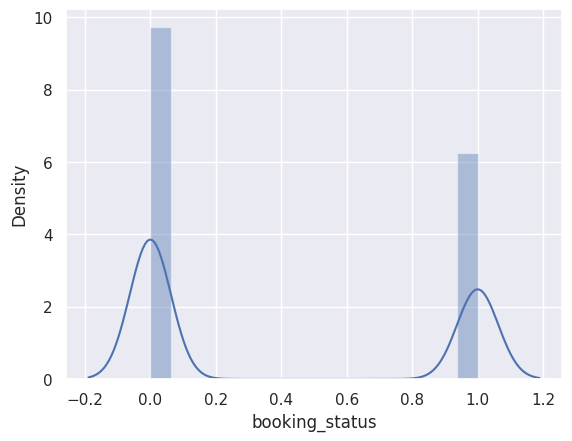

In [ ]:
## KEEPOUTPUT
sns.distplot(d['booking_status']);


<Axes: xlabel='booking_status', ylabel='Count'>

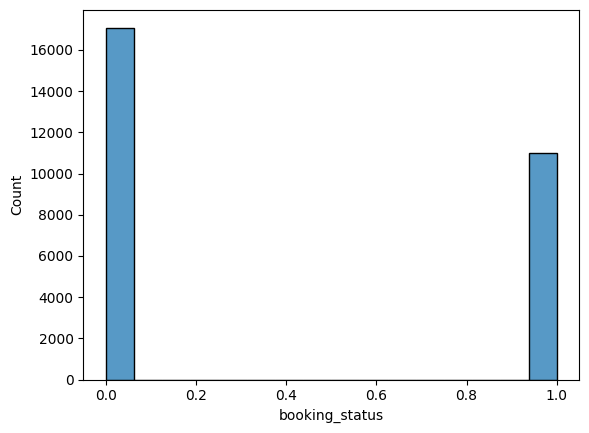

In [ ]:
sns.histplot(d['booking_status'])

In [ ]:
bs = d.booking_status
zeros = bs.value_counts(normalize=True)[0]
unos = bs.value_counts(normalize=True)[1]
print("Ceros: {:.2%}, Unos: {:.2%}".format(zeros, unos))


Ceros: 60.86%, Unos: 39.14%


## Discover data types

In [ ]:
## KEEPOUTPUT
d.columns

Index(['id', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       '67.5', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [ ]:
## KEEPOUTPUT
for c in d_copy.columns:
    print ("%20s"%c, d_copy[c].dtype)

                  id int64
        no_of_adults int64
      no_of_children int64
no_of_weekend_nights int64
   no_of_week_nights int64
   type_of_meal_plan int64
required_car_parking_space int64
  room_type_reserved int64
           lead_time int64
        arrival_year float64
       arrival_month float64
        arrival_date float64
 market_segment_type int64
      repeated_guest int64
no_of_previous_cancellations int64
no_of_previous_bookings_not_canceled int64
  avg_price_per_room float64
no_of_special_requests int64
      booking_status int64


## Inspect numeric columns

In [ ]:
## KEEPOUTPUT
d_copy._get_numeric_data().describe().T

,count,mean,std,min,25%,50%,75%,max
id,28068.0,14033.500000,8102.678014,0.0,7016.75,14033.50,21050.25,28067.0
no_of_adults,28068.0,1.918092,0.524414,0.0,2.00,2.00,2.00,4.0
no_of_children,28068.0,0.141050,0.450040,0.0,0.00,0.00,0.00,9.0
no_of_weekend_nights,28068.0,0.886561,0.886047,0.0,0.00,1.00,2.00,6.0
no_of_week_nights,28068.0,2.400777,1.424664,0.0,1.00,2.00,3.00,17.0
type_of_meal_plan,28068.0,0.238635,0.586411,0.0,0.00,0.00,0.00,3.0
required_car_parking_space,28068.0,0.024619,0.154963,0.0,0.00,0.00,0.00,1.0
room_type_reserved,28068.0,0.428495,0.833387,0.0,0.00,0.00,1.00,6.0
lead_time,28068.0,103.940858,80.974753,0.0,37.00,93.00,155.00,443.0
arrival_year,26568.0,2017.856632,0.350454,2017.0,2018.00,2018.00,2018.00,2018.0


In [ ]:
print (d_copy.shape)
d_copy

(28068, 19)


,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,0,2,0,0,2,1,0,0,9,2018.0,1.0,14.0,1,1,11,0,67.50,0,0
1,1,2,0,1,2,0,0,0,117,2018.0,7.0,29.0,0,0,0,0,72.25,0,0
2,2,2,0,0,1,0,0,0,315,2018.0,12.0,2.0,0,0,0,0,52.00,0,0
3,3,1,0,0,2,1,0,0,32,2018.0,12.0,1.0,1,0,0,0,56.00,0,0
4,4,2,0,1,0,0,0,0,258,2018.0,10.0,16.0,0,0,0,0,100.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28063,28063,2,0,0,1,0,0,0,122,NaN,NaN,NaN,1,0,0,0,105.30,0,0
28064,28064,2,0,2,2,0,0,3,57,NaN,NaN,NaN,1,0,0,0,135.99,3,0
28065,28065,2,2,0,3,0,0,3,78,NaN,NaN,NaN,1,0,0,0,177.30,0,0
28066,28066,1,0,1,2,0,0,0,191,NaN,NaN,NaN,0,0,0,0,49.50,0,0


In [ ]:
## ESTOS DEBEMOS APLICARLE EL GET.DUMMIES()
print(d_copy.type_of_meal_plan.unique())
### ESTE TAMBIEN
print(d_copy.room_type_reserved.unique())
### tambien
print(d_copy.market_segment_type.unique())

[1 0 2 3]
[0 2 3 1 4 5 6]
[1 0 2 3 4]


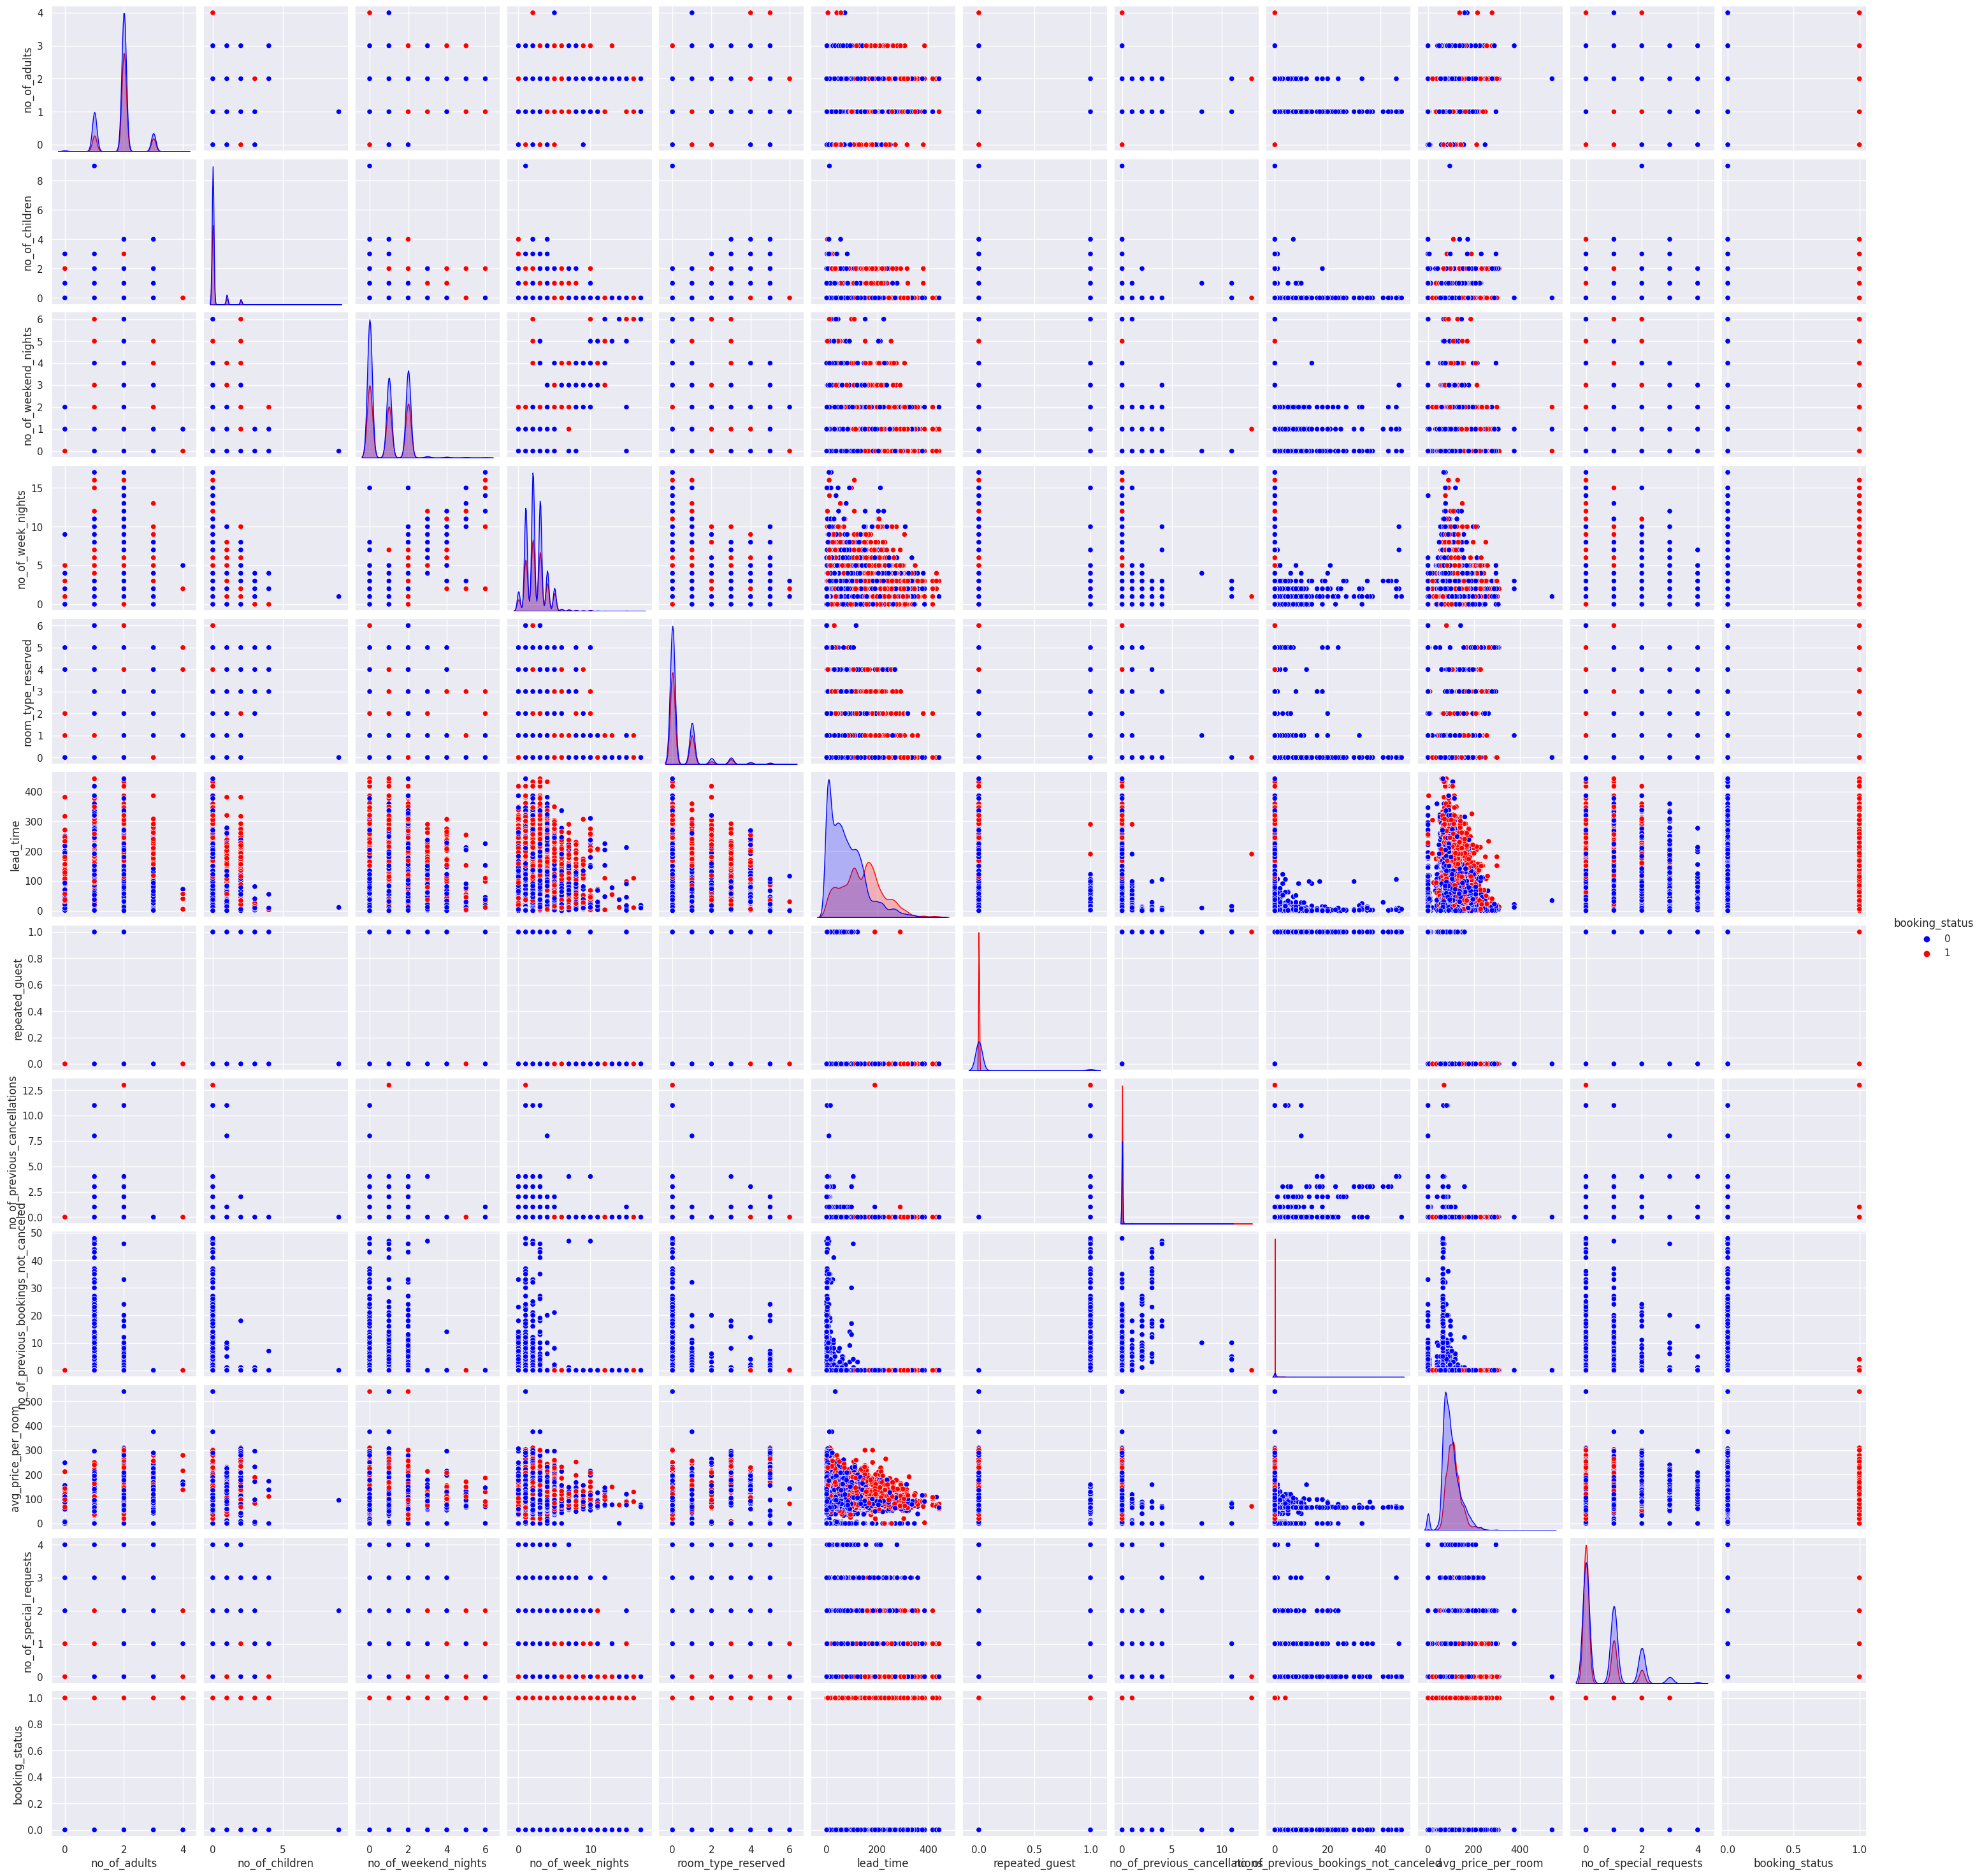

In [ ]:
import seaborn as sns

# separar los datos según el valor de la variable objetivo
grupo_0 = d_copy.loc[d_copy['booking_status'] == 0]
grupo_1 = d_copy.loc[d_copy['booking_status'] == 1]

# crear el pairplot con diferentes colores
sns.pairplot(d_copy, hue='booking_status', palette={0: 'blue', 1: 'red'}, vars=['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 
                                 'room_type_reserved', 'lead_time', 'repeated_guest', 'no_of_previous_cancellations', 
                                  'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests', 'booking_status'])

# mostrar el gráfico
plt.show()


### correlations

## Inspect categorical variables

## Vision on mission values

Missing values in columns